# Introduction

This report aims to explore the Physical Activity Monitoring dataset to gain insights into the amount and type of physical activity carried out by individuals.

This data set has information about 18 different activities that 9 people have done while wearing 3 inertial measurement units (IMUs) and a heart rate monitor. Through a thorough exploratory data analysis, we will attempt to identify patterns and relationships between the different attributes. Furthermore, we will test hypotheses and develop a model that uses multiple attributes to make predictions.

Our goal is to gain insights that can be used to develop hardware and/or software to accurately determine the amount and type of physical activity carried out by an individual.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from tqdm import tqdm
import seaborn as sns
import glob
import random

# Exploratory Data Analysis (EDA)

## Data Collection

As a first step, we are framing a dataset from the individual text files per subject.

We have identified the list of physical activities that are performed by the subjects and stored them in a dictionary data type with ID as the key and name as the value, and we have also identified the different attributes in the dataset.

In [2]:
# activities in a dict with ID as the key and name as the value.
activities_dict = {0: 'other', 1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'nordic walking',
9: 'watching TV', 10: 'computer work', 11: 'car driving', 12: 'ascending stairs', 13: 'descending stairs',
16: 'vacuum cleaning',17: 'ironing', 18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping' }

col_names = ['timestamp', 'activity_id','heart_rate','hand_temp', 
           'hand_3d_acc16_1', 'hand_3d_acc16_2', 'hand_3d_acc16_3', 
           'hand_3d_acc6_1', 'hand_3d_acc6_2', 'hand_3d_acc6_3', 
           'hand_3d_gyro_1', 'hand_3d_gyro_2', 'hand_3d_gyro_3', 
           'hand_magne_1', 'hand_magne_2', 'hand_magne_3',
           'hand_orientation_1', 'hand_orientation_2', 'hand_orientation_3', 'hand_orientation_4',
           'chest_temp', 'chest_3d_acc16_1', 'chest_3d_acc16_2', 'chest_3d_acc16_3', 
           'chest_3d_acc6_1', 'chest_3d_acc6_2', 'chest_3d_acc6_3', 
           'chest_3d_gyro_1', 'chest_3d_gyro_2', 'chest_3d_gyro_3', 
           'chest_magne_1', 'chest_magne_2', 'chest_magne_3',
           'chest_orientation_1', 'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
           'ankle_temp', 'ankle_3d_acc16_1', 'ankle_3d_acc16_2', 'ankle_3d_acc16_3', 
           'ankle_3d_acc6_1', 'ankle_3d_acc6_2', 'ankle_3d_acc6_3', 
           'ankle_3d_gyro_1', 'ankle_3d_gyro_2', 'ankle_3d_gyro_3', 
           'ankle_magne_1', 'ankle_magne_2', 'ankle_magne_3',
           'ankle_orientation_1', 'ankle_orientation_2', 'ankle_orientation_3', 'ankle_orientation_4']

len(col_names) # length of the columns

54

In [3]:
df = pd.DataFrame()
#Loading all the data files
for filename in tqdm(glob.glob("PAMAP2_Dataset/Protocol/*.dat")):
    pdt = pd.read_table(filename, header=None, sep='\s+|\s+',engine='python')
    pdt.columns = col_names #setting the columns
    pdt['subject_id'] = int(filename[-5]) #setting the subject id
    df = pd.concat([df, pdt], ignore_index=True) #concatenating the dataframe

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:21<00:00, 15.69s/it]


In [4]:
#resetting the index value
df.reset_index(drop=True, inplace=True)
df.head()

,timestamp,activity_id,heart_rate,hand_temp,hand_3d_acc16_1,hand_3d_acc16_2,hand_3d_acc16_3,hand_3d_acc6_1,hand_3d_acc6_2,hand_3d_acc6_3,...,ankle_3d_gyro_2,ankle_3d_gyro_3,ankle_magne_1,ankle_magne_2,ankle_magne_3,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4,subject_id
0,5.89,0,NaN,33.3125,-9.79760,-1.45670,1.014380,-9.70702,-1.60337,1.32098,...,0.010364,0.010731,-35.4550,38.3829,-17.9083,0.546211,0.370903,0.695334,0.283892,8
1,5.90,0,NaN,33.3125,-9.91204,-1.41822,0.974050,-9.78262,-1.60285,1.29085,...,-0.005926,-0.006704,-35.4508,38.2543,-17.7663,0.545806,0.370867,0.695680,0.283872,8
2,5.91,0,NaN,33.3125,-9.87531,-1.57027,0.975113,-9.78237,-1.57265,1.29079,...,-0.002265,0.014646,-35.6984,38.2688,-17.0580,0.545484,0.371607,0.695437,0.284117,8
3,5.92,0,NaN,33.3125,-9.72175,-1.60870,1.054520,-9.70677,-1.60334,1.35118,...,0.035314,0.010982,-34.9492,38.7447,-17.6233,0.545474,0.372077,0.694859,0.284935,8
4,5.93,0,NaN,33.3125,-9.79920,-1.49497,0.975999,-9.58657,-1.57408,1.27549,...,-0.001065,-0.000410,-35.2105,38.8857,-17.9080,0.545810,0.372349,0.694122,0.285732,8


After framing the dataset from all the given files, we have a count of more than **two million rows** with **55 columns**.

In [5]:
#finding the number of rows and columns in the dataframe.
df.shape

(2872533, 55)

# Data Cleaning

Before utilising the dataset, it is necessary to cleanse the data and verify that all attributes are correct and useful. This involves removing any duplicates, correcting any incorrect values, formatting the data correctly, and filling in any missing values. The data may also be standardised to guarantee that they are all on the same scale, which helps improve the accuracy of the model. In addition, outliers must be detected and eliminated from the collection. which will be done in a later step before building the model. Once the dataset has been thoroughly cleaned and prepared, it is ready for analysis.

In [6]:
#checking for duplicate values in the dataset.
sum(df.duplicated())

0

In [7]:
#checking for any missing values in the dataset.
df.isnull().sum()

timestamp                    0
activity_id                  0
heart_rate             2610265
hand_temp                13141
hand_3d_acc16_1          13141
hand_3d_acc16_2          13141
hand_3d_acc16_3          13141
hand_3d_acc6_1           13141
hand_3d_acc6_2           13141
hand_3d_acc6_3           13141
hand_3d_gyro_1           13141
hand_3d_gyro_2           13141
hand_3d_gyro_3           13141
hand_magne_1             13141
hand_magne_2             13141
hand_magne_3             13141
hand_orientation_1       13141
hand_orientation_2       13141
hand_orientation_3       13141
hand_orientation_4       13141
chest_temp                3563
chest_3d_acc16_1          3563
chest_3d_acc16_2          3563
chest_3d_acc16_3          3563
chest_3d_acc6_1           3563
chest_3d_acc6_2           3563
chest_3d_acc6_3           3563
chest_3d_gyro_1           3563
chest_3d_gyro_2           3563
chest_3d_gyro_3           3563
chest_magne_1             3563
chest_magne_2             3563
chest_ma

Since there are a lot of **NaN** values for most of the attributes, as mentioned in the document, this is due to some wireless data dropping while subjects are performing, and those missing values are indicated as NaN values in the dataset.

As you see from the above output, **heart rate (HR)** has the highest number of NaN values and is an important attribute for us to make a prediction model. It will have an impact if we drop all the NaN values, so instead we can fill in the missing values by grouping the **activity and subject** and aggregating it with the **mean** value for each attribute and filling it with those values.

As mentioned in the document, `acceleration over ±6g` gets saturated sometimes for certain movements like running. It's not a good recommendation feature for the prediction, and in this data set, `orientation data` is also invalid.
So we are dropping all the invalid attributes.

And also, data labelled with `activity_id=0` should be discarded from the analysis. we are dropping it too.

In [8]:
def do_data_cleaning(data_frame):
    """This function is used to clean the given dataset by dropping
    some unwanted columns and filling the missing values for each column. 
    """
    data_frame = data_frame.drop(['hand_3d_acc6_1', 'hand_3d_acc6_2', 'hand_3d_acc6_3', 
                                   'chest_3d_acc6_1', 'chest_3d_acc6_2', 'chest_3d_acc6_3', 
                                   'ankle_3d_acc6_1', 'ankle_3d_acc6_2', 'ankle_3d_acc6_3', 
                                   'hand_orientation_1', 'hand_orientation_2', 'hand_orientation_3', 'hand_orientation_4',
                                   'chest_orientation_1', 'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
                                   'ankle_orientation_1', 'ankle_orientation_2', 'ankle_orientation_3', 'ankle_orientation_4'],
                                   axis = 1)  #dropping the invalid columns
    data_frame = data_frame.apply(pd.to_numeric, errors = 'coerce') #convert non-numeric values to NAN
    data_frame = data_frame[(data_frame['activity_id'] > 0)] #filtering out other type physical activity
    #handling NaN values with mean value by grouping the activity id and subject id
    for column in data_frame:
        data_frame[column] = data_frame[column].fillna(data_frame.groupby(['activity_id', 'subject_id'])[column].transform('mean'))
    data_frame = data_frame.reset_index(drop=True)#resetting the index value
    return data_frame

In [9]:
#cleaning the dataset
preprocessed_df = do_data_cleaning(df)

In [10]:
#checking for any missing values in the dataset.
preprocessed_df.isnull().sum()

timestamp           0
activity_id         0
heart_rate          1
hand_temp           0
hand_3d_acc16_1     0
hand_3d_acc16_2     0
hand_3d_acc16_3     0
hand_3d_gyro_1      0
hand_3d_gyro_2      0
hand_3d_gyro_3      0
hand_magne_1        0
hand_magne_2        0
hand_magne_3        0
chest_temp          0
chest_3d_acc16_1    0
chest_3d_acc16_2    0
chest_3d_acc16_3    0
chest_3d_gyro_1     0
chest_3d_gyro_2     0
chest_3d_gyro_3     0
chest_magne_1       0
chest_magne_2       0
chest_magne_3       0
ankle_temp          0
ankle_3d_acc16_1    0
ankle_3d_acc16_2    0
ankle_3d_acc16_3    0
ankle_3d_gyro_1     0
ankle_3d_gyro_2     0
ankle_3d_gyro_3     0
ankle_magne_1       0
ankle_magne_2       0
ankle_magne_3       0
subject_id          0
dtype: int64

As we see, there is a single NaN value for the heart_rate column. This is because in the dataset, we only have one data for `subject 4` on the running activity`(5)`. So now we are dropping it.

In [11]:
#finding the row which contains the null values
preprocessed_df[preprocessed_df.isnull().any(axis=1)]

,timestamp,activity_id,heart_rate,hand_temp,hand_3d_acc16_1,hand_3d_acc16_2,hand_3d_acc16_3,hand_3d_gyro_1,hand_3d_gyro_2,hand_3d_gyro_3,...,ankle_3d_acc16_1,ankle_3d_acc16_2,ankle_3d_acc16_3,ankle_3d_gyro_1,ankle_3d_gyro_2,ankle_3d_gyro_3,ankle_magne_1,ankle_magne_2,ankle_magne_3,subject_id
982785,3301.46,5,NaN,27.5,-4.61858,6.44599,-5.9394,0.008226,0.008636,0.02235,...,9.64365,0.869277,-2.431,-0.015812,-0.000262,-0.00119,-49.8489,5.81694,2.78633,4


In [12]:
#dropping the NaN value from the dataset
preprocessed_df = preprocessed_df.dropna()

In [13]:
preprocessed_df.isnull().sum()

timestamp           0
activity_id         0
heart_rate          0
hand_temp           0
hand_3d_acc16_1     0
hand_3d_acc16_2     0
hand_3d_acc16_3     0
hand_3d_gyro_1      0
hand_3d_gyro_2      0
hand_3d_gyro_3      0
hand_magne_1        0
hand_magne_2        0
hand_magne_3        0
chest_temp          0
chest_3d_acc16_1    0
chest_3d_acc16_2    0
chest_3d_acc16_3    0
chest_3d_gyro_1     0
chest_3d_gyro_2     0
chest_3d_gyro_3     0
chest_magne_1       0
chest_magne_2       0
chest_magne_3       0
ankle_temp          0
ankle_3d_acc16_1    0
ankle_3d_acc16_2    0
ankle_3d_acc16_3    0
ankle_3d_gyro_1     0
ankle_3d_gyro_2     0
ankle_3d_gyro_3     0
ankle_magne_1       0
ankle_magne_2       0
ankle_magne_3       0
subject_id          0
dtype: int64

**Now we can see there are no NaN values in the attributes.**

In [14]:
preprocessed_df.head()

,timestamp,activity_id,heart_rate,hand_temp,hand_3d_acc16_1,hand_3d_acc16_2,hand_3d_acc16_3,hand_3d_gyro_1,hand_3d_gyro_2,hand_3d_gyro_3,...,ankle_3d_acc16_1,ankle_3d_acc16_2,ankle_3d_acc16_3,ankle_3d_gyro_1,ankle_3d_gyro_2,ankle_3d_gyro_3,ankle_magne_1,ankle_magne_2,ankle_magne_3,subject_id
0,67.36,1,84.00000,33.8125,-9.64938,-1.68584,0.978888,-0.008240,-0.029004,0.002536,...,9.56066,-0.268664,-2.50197,-0.009174,-0.058976,0.001427,-34.9285,37.8429,-17.4803,8
1,67.37,1,73.58552,33.8125,-9.80348,-1.72328,0.899731,0.054293,-0.001861,-0.023345,...,9.55465,-0.152831,-2.73429,-0.018588,0.020064,-0.008885,-34.9496,38.6152,-17.9068,8
2,67.38,1,73.58552,33.8125,-9.65232,-1.53509,0.862873,0.000324,-0.042501,-0.037061,...,9.63151,-0.191916,-2.65608,0.023151,0.020882,-0.019795,-35.5699,37.4857,-18.4750,8
3,67.39,1,73.58552,33.8125,-9.65045,-1.64823,0.940257,0.009701,-0.012660,0.007476,...,9.55866,-0.230053,-2.57941,-0.009122,-0.003075,-0.013015,-35.4679,38.7685,-18.3343,8
4,67.40,1,73.58552,33.8125,-9.54564,-1.53764,0.672043,-0.026993,-0.003300,0.006464,...,9.55846,-0.268022,-2.57917,0.013797,-0.009872,0.032670,-35.4625,38.5107,-18.3340,8


In the dataset, we have separate columns of the x, y, and z values for each position of the sensors, like the hand, chest, and ankle. It will be an additional feature attribute for the prediction model. To avoid confusion, now we are calculating the total acceleration for the `3D-acceleration` data and `3D-gyroscope` data attributes.

The total acceleration can be calculated by taking the square root of the sum of the squares of the individual x, y, and z g-force values. This is expressed mathematically as: 

**Total Acceleration** = $\sqrt{x^2 + y^2 + z^2}$

In [15]:
#finding total acceleration for the hand, chest and ankle
preprocessed_df['hand_total_acc'] = ((preprocessed_df.hand_3d_acc16_1**2)+(preprocessed_df.hand_3d_acc16_2**2)+(preprocessed_df.hand_3d_acc16_3**2))**0.5
preprocessed_df['chest_total_acc'] = ((preprocessed_df.chest_3d_acc16_1**2)+(preprocessed_df.chest_3d_acc16_2**2)+(preprocessed_df.chest_3d_acc16_3**2))**0.5
preprocessed_df['ankle_total_acc'] = ((preprocessed_df.ankle_3d_acc16_1**2)+(preprocessed_df.ankle_3d_acc16_2**2)+(preprocessed_df.ankle_3d_acc16_3**2))**0.5
preprocessed_df['hand_total_gyr'] = ((preprocessed_df.hand_3d_gyro_1**2)+(preprocessed_df.hand_3d_gyro_2**2)+(preprocessed_df.hand_3d_gyro_3**2))**0.5
preprocessed_df['chest_total_gyr'] = ((preprocessed_df.chest_3d_gyro_1**2)+(preprocessed_df.chest_3d_gyro_2**2)+(preprocessed_df.chest_3d_gyro_3**2))**0.5
preprocessed_df['ankle_total_gyr'] = ((preprocessed_df.ankle_3d_gyro_1**2)+(preprocessed_df.ankle_3d_gyro_2**2)+(preprocessed_df.ankle_3d_gyro_3**2))**0.5

#dropping the unwanted columns
main_df = preprocessed_df.drop(['hand_3d_acc16_1', 'hand_3d_acc16_2', 'hand_3d_acc16_3', 'chest_3d_acc16_1', 'chest_3d_acc16_2', 'chest_3d_acc16_3',
                                        'ankle_3d_acc16_1', 'ankle_3d_acc16_2', 'ankle_3d_acc16_3', 'hand_3d_gyro_1', 'hand_3d_gyro_2', 'hand_3d_gyro_3',
                                       'chest_3d_gyro_1', 'chest_3d_gyro_2', 'chest_3d_gyro_3', 'ankle_3d_gyro_1', 'ankle_3d_gyro_2', 'ankle_3d_gyro_3'], axis = 1)

#resetting the index values
main_df = main_df.reset_index(drop=True)

## Data Split

Data splitting is an important part of the analysis. It is a process of dividing the dataset into two or more subsets that can be used to train and test models.

It is usually done by randomly selecting a subset of the data to be used as the training set and the remainder as the testing set. Generally, the training set is used to train the model, and the testing set is used to evaluate the model's performance.

So now, the dataset has been split into training and testing sets using an **80:20 ratio**. The training set is used to analyse the data and train the models, and the testing set is used to test the hypotheses.

In [16]:
#splitting the dataset for training
train_df = main_df.sample(frac=0.8, random_state=1)
#splitting the dataset for testing by dropping the train data index
test_df = main_df.drop(train_df.index)
main_df_count = len(main_df.index)
train_df_count = len(train_df.index)
test_df_count = len(test_df.index)

In [17]:
print(f"The total number of train data is {train_df_count} and percentage is {round((train_df_count / main_df_count) * 100)}%")

The total number of train data is 1554297 and percentage is 80%


In [18]:
print(f"The total number of train data is {test_df_count} and percentage of {round((test_df_count / main_df_count) * 100)}%")

The total number of train data is 388574 and percentage of 20%


## Data Distribution

It's important to see how the data was distributed for each column. This aids in the identification of any trends or relationships between the attributes. This can be done by visualising the data using charts and graphs. Additionally, descriptive statistics such as mean, median, and standard deviation can be used to further explore the data.

In [19]:
#dropping the unwanted columns for the plotting
dist_df = train_df.drop(['timestamp', 'activity_id', 'subject_id'], axis=1)

In [20]:
#finding the statistical summary of the dataset
dist_df.describe()

,heart_rate,hand_temp,hand_magne_1,hand_magne_2,hand_magne_3,chest_temp,chest_magne_1,chest_magne_2,chest_magne_3,ankle_temp,ankle_magne_1,ankle_magne_2,ankle_magne_3,hand_total_acc,chest_total_acc,ankle_total_acc,hand_total_gyr,chest_total_gyr,ankle_total_gyr
count,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06
mean,1.075118e+02,3.275055e+01,2.112448e+01,-1.398353e+01,-2.438639e+01,3.617892e+01,4.471100e+00,-3.065984e+01,4.588605e+00,3.371161e+01,-3.159111e+01,1.403898e+00,1.724465e+01,1.096438e+01,1.017925e+01,1.239977e+01,1.503008e+00,5.200029e-01,1.426269e+00
std,2.510921e+01,1.794353e+00,2.376940e+01,2.419435e+01,2.005248e+01,1.495499e+00,1.704326e+01,1.753023e+01,2.158481e+01,1.092254e+00,1.833597e+01,2.166200e+01,1.969090e+01,5.633378e+00,3.831686e+00,7.691713e+00,1.712483e+00,5.937420e-01,1.917445e+00
min,5.700000e+01,2.487500e+01,-1.039410e+02,-2.000430e+02,-1.649370e+02,3.193750e+01,-6.986630e+01,-1.224800e+02,-6.668470e+01,3.000000e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.439679e-01,6.147588e-02,1.253437e-01,5.192451e-04,4.477602e-04,5.792568e-04
25%,8.752816e+01,3.168750e+01,4.861830e+00,-2.905620e+01,-3.868270e+01,3.518750e+01,-6.091100e+00,-3.991140e+01,-9.815620e+00,3.300000e+01,-4.169210e+01,-1.240750e+01,3.831440e+00,9.445971e+00,9.469290e+00,9.859864e+00,1.591821e-01,9.549480e-02,5.802104e-02
50%,1.066925e+02,3.312500e+01,2.294440e+01,-1.609150e+01,-2.383920e+01,3.643750e+01,2.698120e+00,-3.345570e+01,2.995650e+00,3.406250e+01,-3.402240e+01,7.612280e-01,1.871540e+01,9.800772e+00,9.829147e+00,1.004433e+01,9.674355e-01,3.673492e-01,5.239766e-01
75%,1.248858e+02,3.406250e+01,3.931120e+01,2.076390e+00,-1.126200e+01,3.743750e+01,1.391330e+01,-2.402360e+01,2.020420e+01,3.450000e+01,-1.792990e+01,1.781040e+01,3.118870e+01,1.127004e+01,1.039558e+01,1.175758e+01,2.228075e+00,7.044646e-01,2.128280e+00
max,2.020000e+02,3.550000e+01,1.375370e+02,1.094870e+02,1.017580e+02,3.856250e+01,8.047390e+01,4.002550e+01,9.635850e+01,3.543750e+01,9.155160e+01,9.424780e+01,1.469000e+02,2.198549e+02,1.516452e+02,2.621491e+02,3.767916e+01,1.868213e+01,3.431539e+01


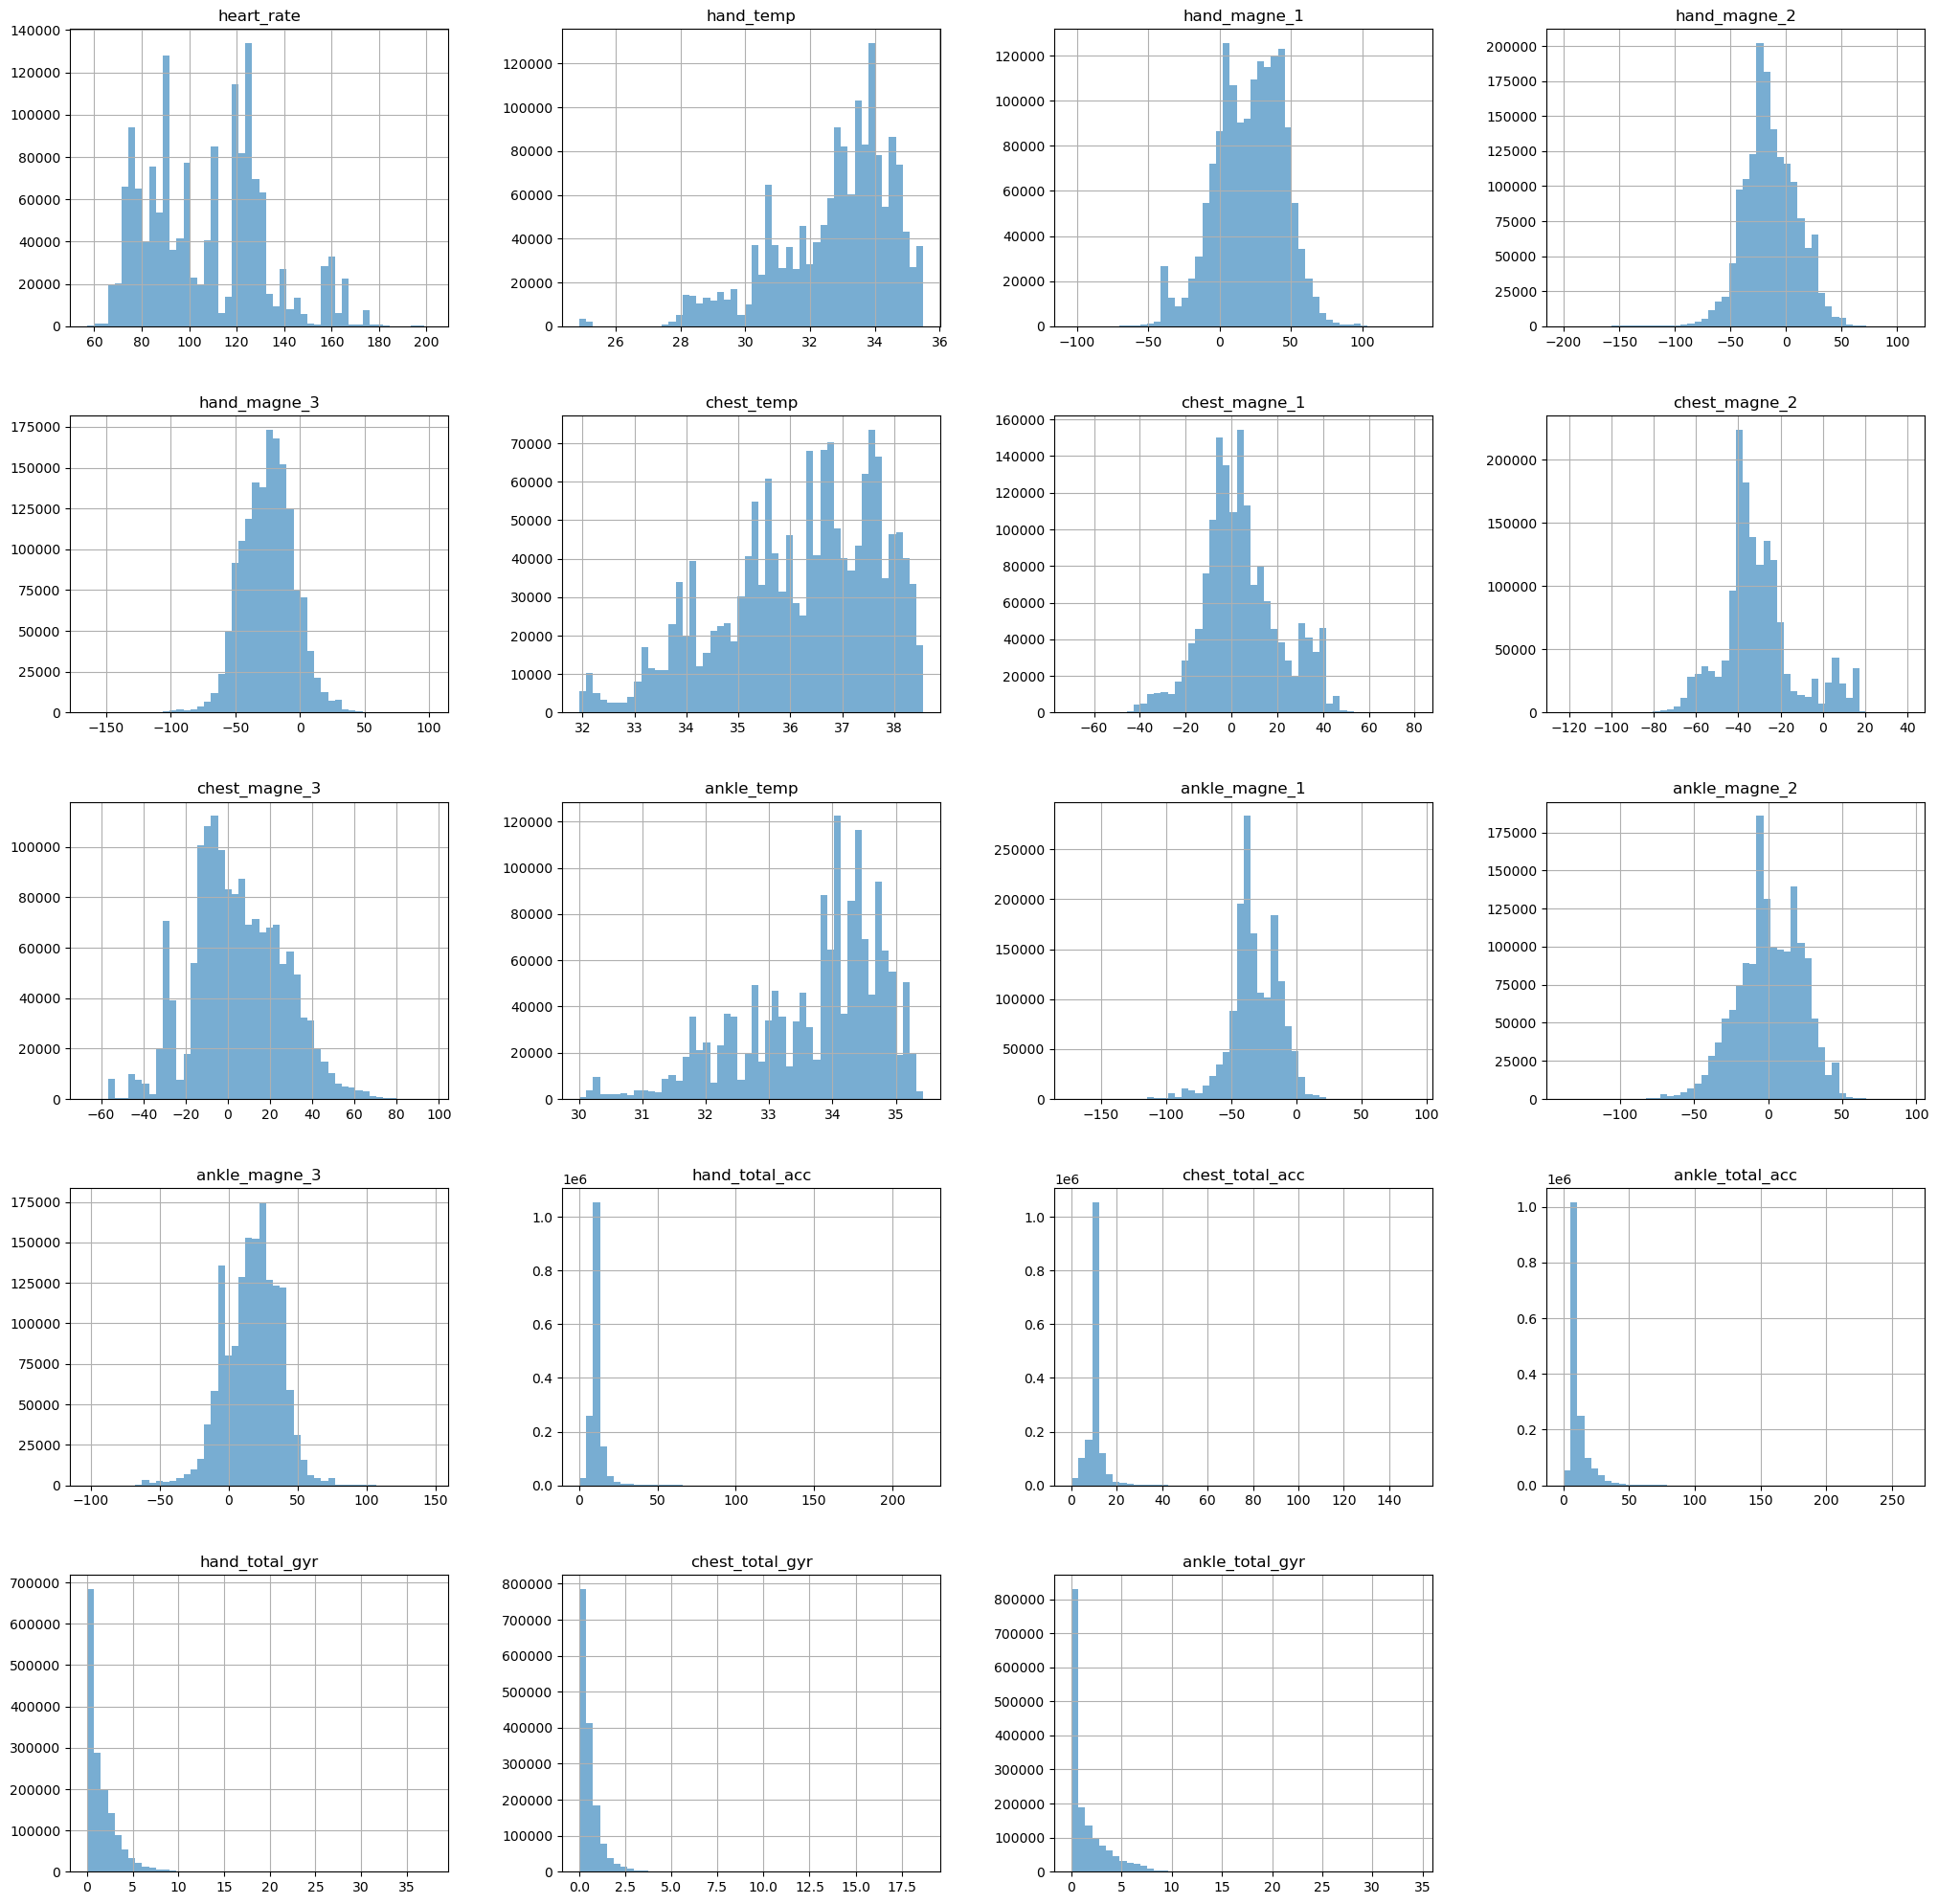

In [21]:
#plotting the dataframe in a histogram
dist_df.hist(figsize = (25,25), bins=50, alpha=0.6)
plt.show()

From the above chart, we can see that the attributes of heart rate, temperature of the chest, hand, and ankle are **normally distributed** over the data, while attributes like acceleration and gyroscope of the chest, hand, and ankle seem to be **right-skew distributed**. This means that the distribution curve's outliers are further to the right and closer to the mean on the left. We might need to scale the datasets before modelling.

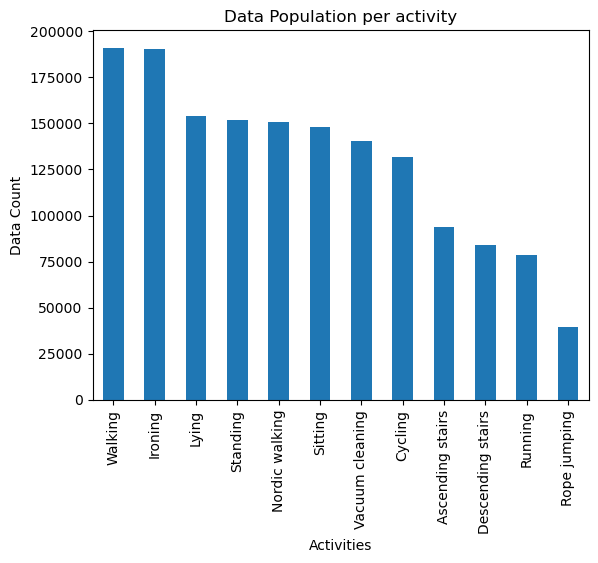

In [22]:
def draw_bar_chart(dataframe, x_label, y_label, title):
    """
    This method used to draw the bar chart for the given dataframe
    """
    dataframe.plot.bar()   
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

#finding the total count of each activity
activity_counts_df = train_df['activity_id'].value_counts()
#setting the index value with the activitiy name
activity_counts_df.index = [label.capitalize() for label in activity_counts_df.index.map(activities_dict)] 
draw_bar_chart(activity_counts_df, "Activities", "Data Count", "Data Population per activity")

`Walking`, `ironing`, and `lying`, which are considered **low-intensity activities**, have a **high data count** when compared to **high-intensity activities** like `running`, `rope jumping`, as shown in the above chart. Since we are exploring the dataset with the train dataframe, it is sufficient to do the hypothesis testing with the test dataframe to prove it statistically.

## Correlation Matrix

It helps us to find the correlation coefficients between different variables. The correlation coefficient is a measure of the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). It can also be used to identify which variables are related and which variables are not related.

In [23]:
#dropping the columns for the plotting the chart
chart_df = train_df.drop(['subject_id', 'activity_id'],  axis = 1)
chart_df = chart_df.reset_index(drop=True)

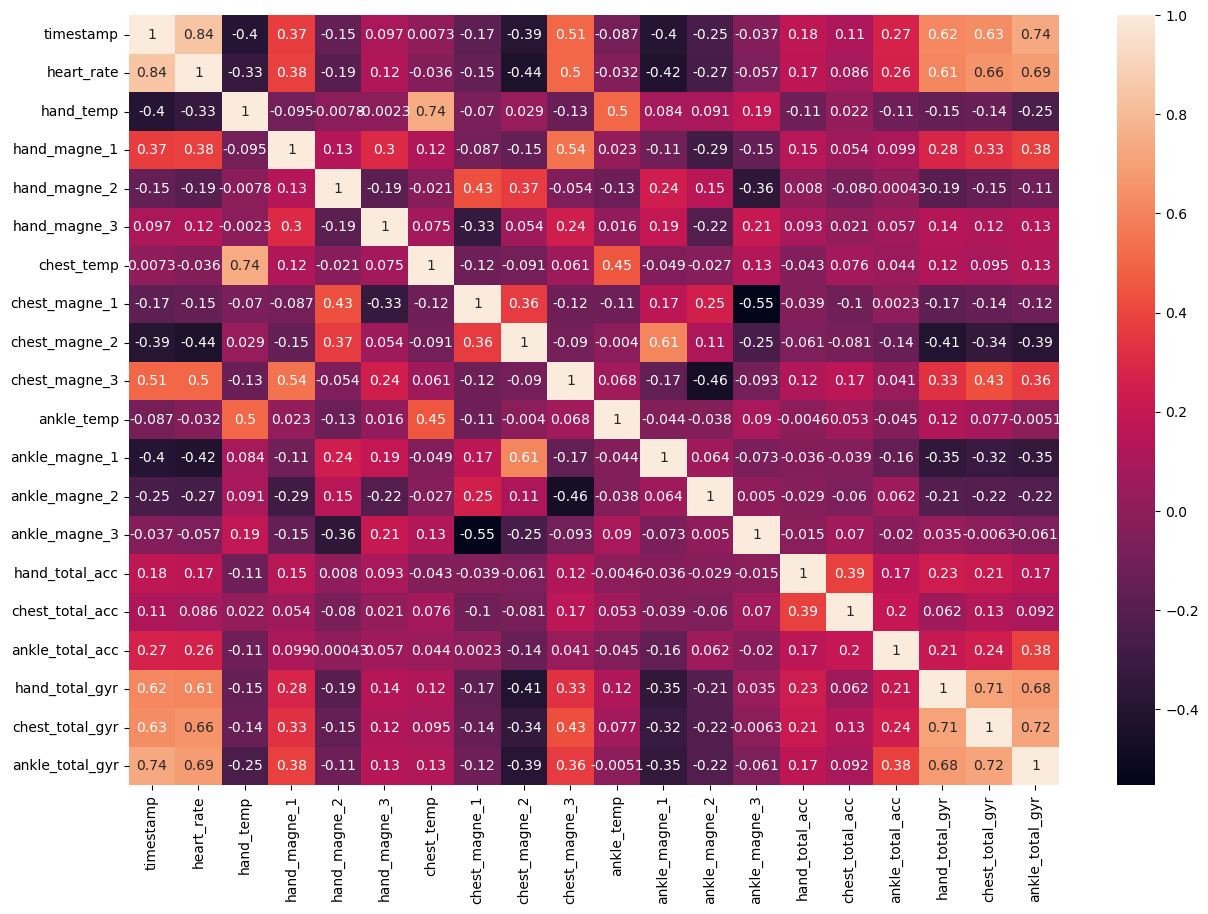

In [24]:
#plotting the dataframe with the spearman correlation
corr_df = chart_df.corr(method='spearman')
f, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_df, annot=True, ax=axis)
plt.show()

From the correlation matrix: 

- we can see that the **highest correlation** is between **timestamp and heart rate (0.84)**.
- We can also see that **hand and chest temperature are highly correlated** with each other **(0.74)**. This suggests that they are both strongly correlated to the environment's temperature.
- Additionally, we can observe that the **total accelerometer and gyroscope values are all strongly correlated** with each other (0.73 and 0.63 respectively). This suggests that these three sensors are related and can be used together to measure movement activity.
- Furthermore, the **ankle and hand temperatures have weak correlations** with all of the other body sensors, indicating that these two sensors may not be related to the other body sensors.
- There was a **negative correlation between the heart rate and the magnetometer attributes**. so we can skip all the negative correlation attributes while training the model.

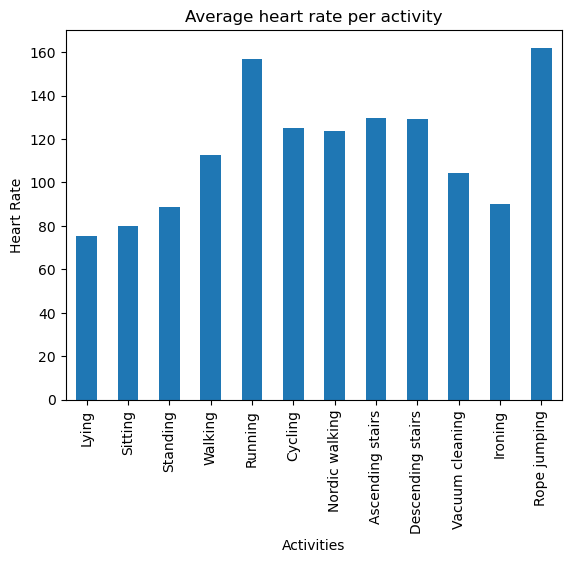

In [25]:
#grouping heart rate data with activity id and aggregate with the mean for each activity
activities_heart_rate_df = train_df['heart_rate'].groupby(train_df['activity_id']).mean()
#setting the index value with the activitiy name
activities_heart_rate_df.index = [label.capitalize() for label in activities_heart_rate_df.index.map(activities_dict)] 
draw_bar_chart(activities_heart_rate_df, "Activities", "Heart Rate", "Average heart rate per activity")

In [26]:
activities_heart_rate_df.nlargest(n=5)

Rope jumping         162.017353
Running              156.721346
Ascending stairs     129.551503
Descending stairs    129.154637
Cycling              124.877666
Name: heart_rate, dtype: float64

The above chart shows the average heart rate for different physical activities. From the data, we can draw some interesting insights.
- First, **rope jumping** has the highest average heart rate, which indicates that it is the most strenuous activity among the five listed. **Running** also has a high average heart rate, suggesting that it is a moderately strenuous activity.
- Second, both **ascending stairs** and **descending stairs** have average heart rates that are lower than when jumping rope or running. This means that both are **low-intensity activities**.

Overall, the data suggests that **rope jumping and running are the most strenuous activities**, while cycling and climbing stairs are the least strenuous. With these insights, we can consider this attribute one of the features of the model predictions.

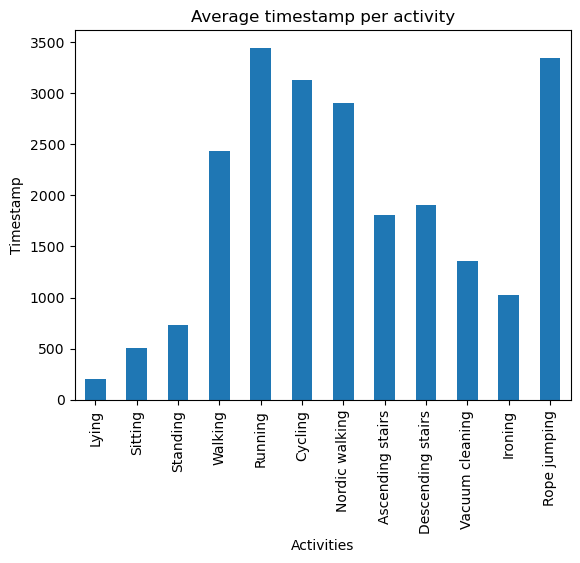

In [27]:
#grouping timestamp data with activity id and aggregate with the mean for each activity
activities_timestamp_df = train_df['timestamp'].groupby(train_df['activity_id']).mean()
#setting the index value with the activitiy name
activities_timestamp_df.index = [label.capitalize() for label in activities_timestamp_df.index.map(activities_dict)] 
draw_bar_chart(activities_timestamp_df, "Activities", "Timestamp", "Average timestamp per activity")

In [28]:
activities_timestamp_df.nlargest(n=5)

Running           3445.772364
Rope jumping      3349.056615
Cycling           3129.559928
Nordic walking    2903.638472
Walking           2430.189926
Name: timestamp, dtype: float64

The above output shows the average timestamp for different activities. We can see that running has the highest average timestamp, followed by rope jumping, cycling, nordic walking and walking. Additionally, the difference in average time stamps between the activities suggests that **running** and **rope jumping** are the most physically demanding activities, while **walking** is the least physically demanding. This could be due to the intensity of the activities or the duration of the activities.

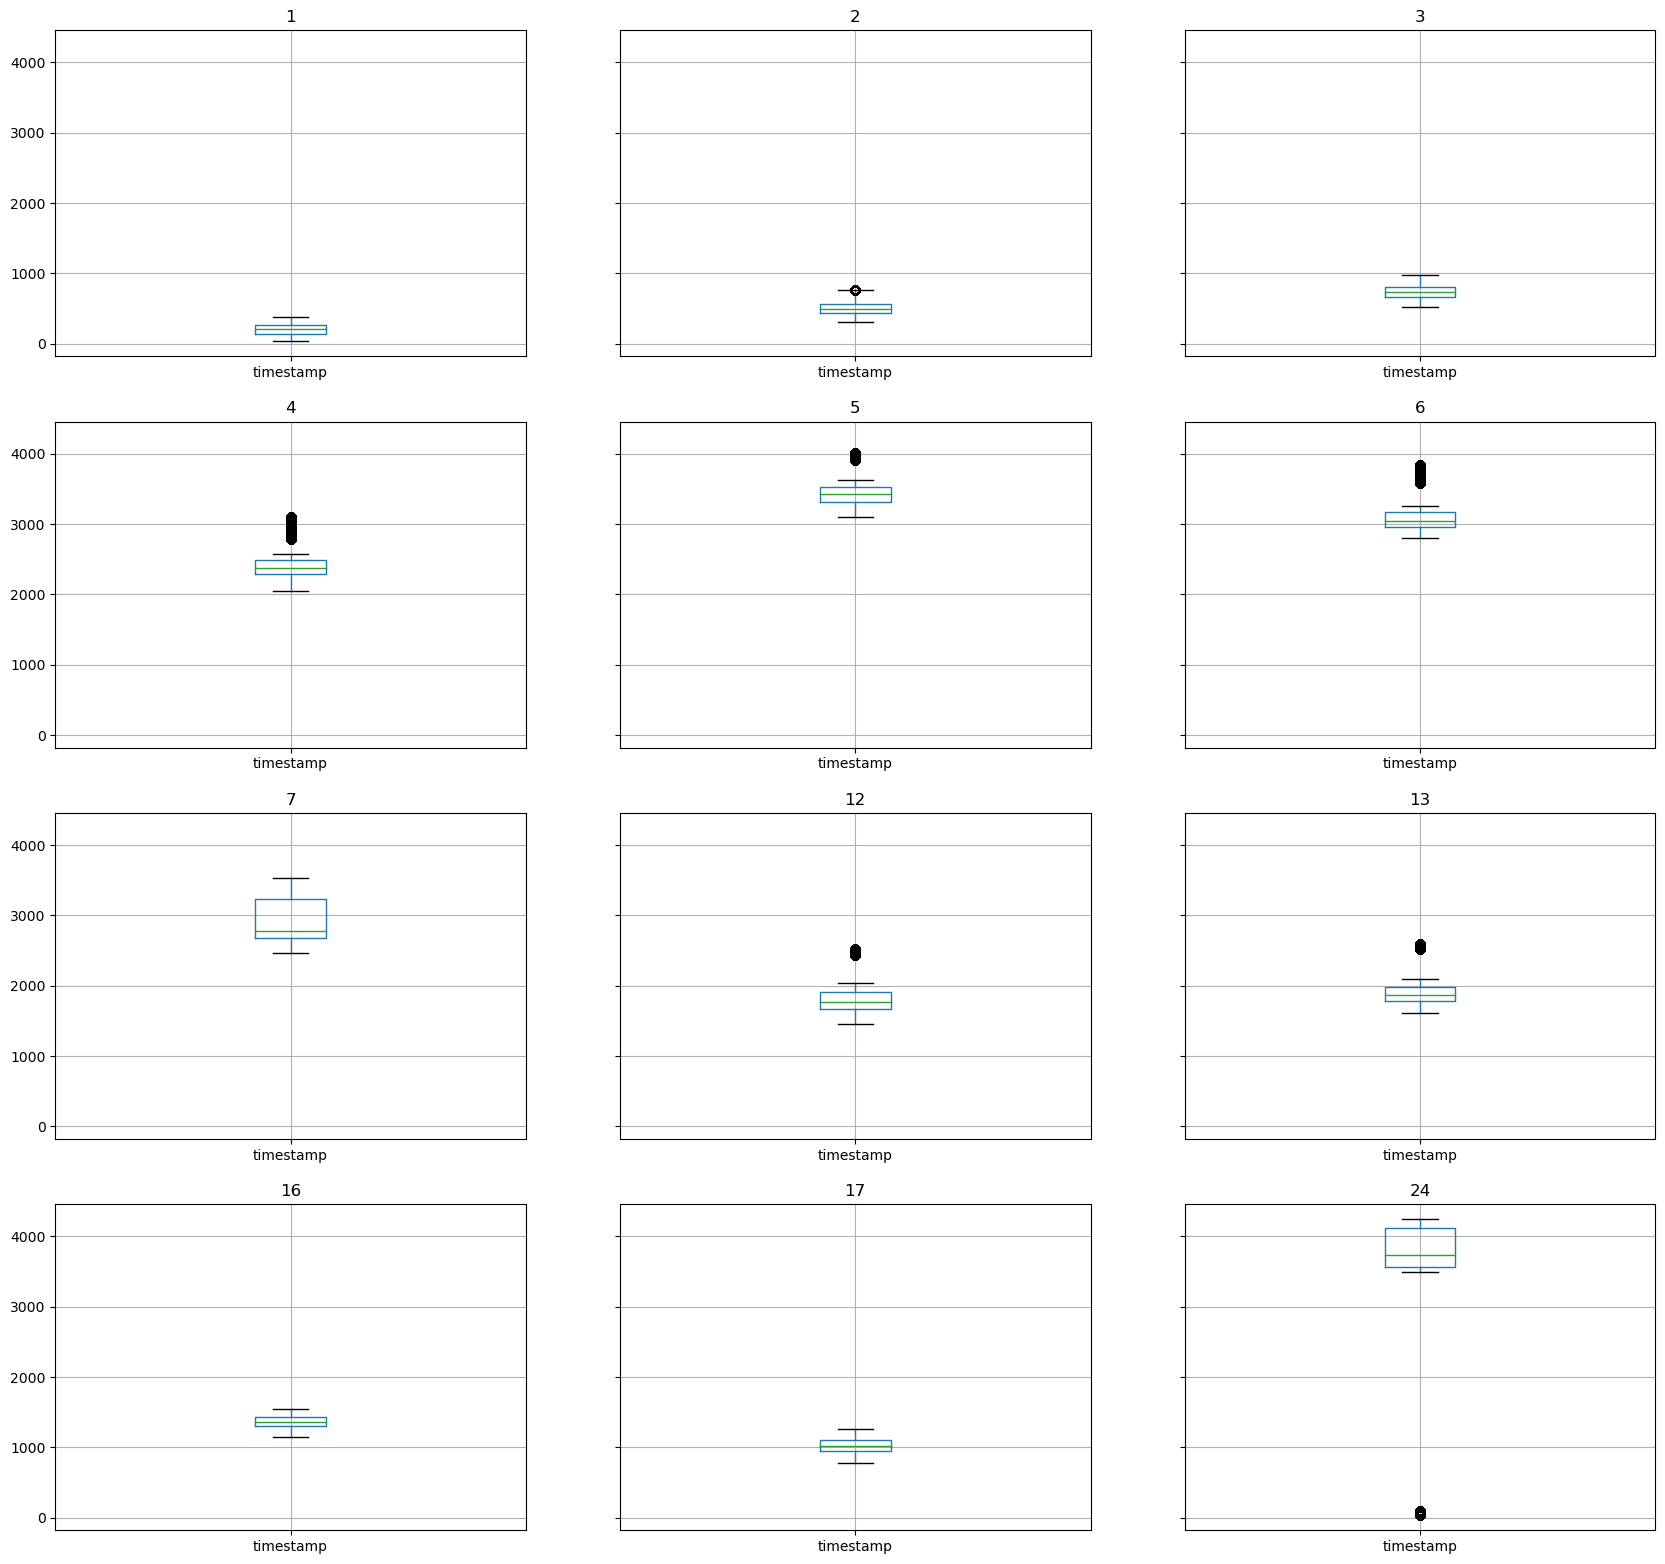

In [29]:
#grouping timestamp data with activity id
timestamp_df = train_df[['timestamp']].groupby(train_df['activity_id'])
timestamp_df.boxplot(figsize = (20,20))
plt.show()

From the above boxplot, it can be observed that the outliers of the timestamp attribute are the maximums for `rope jumping`, `walking`, `running`, and `cycling`. Outliers will affect the accuracy of the model's prediction. so it would be better if we could scale the data before training the dataset for the prediction.

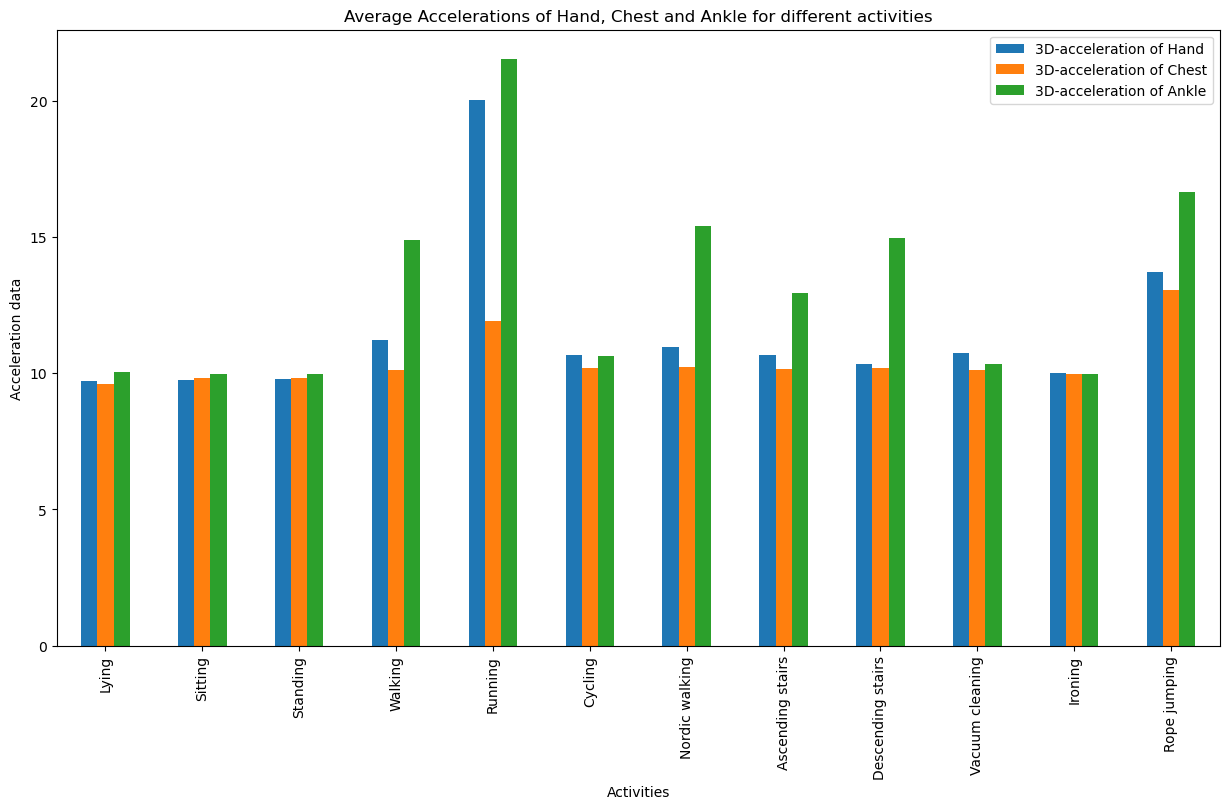

In [30]:
def draw_group_bar_chart(dataframe, x_label, y_label, title, legends):
    """
    This method used to draw the grouped bar chart for the given dataframe
    """
    dataframe.plot(kind = 'bar', figsize = (15,8)) 
    plt.legend(legends)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
hand_acc_mean_df = train_df['hand_total_acc'].groupby(train_df['activity_id']).mean()
chest_acc_mean_df = train_df['chest_total_acc'].groupby(train_df['activity_id']).mean()
ankle_acc_mean_df = train_df['ankle_total_acc'].groupby(train_df['activity_id']).mean()
#combining the three attributes means of acceleration so that they can be plotted in the same plot as a triple bar graph 
acc_mean_df = pd.concat([hand_acc_mean_df,chest_acc_mean_df,ankle_acc_mean_df],axis = 1)
acc_mean_df.index = [label.capitalize() for label in acc_mean_df.index.map(activities_dict)]
draw_group_bar_chart(acc_mean_df, "Activities", "Acceleration data",
               "Average Accelerations of Hand, Chest and Ankle for different activities",
              ['3D-acceleration of Hand', '3D-acceleration of Chest', '3D-acceleration of Ankle'])

From the above output, we can see that activities such as `running` and `rope jumping` require **more physical effort** than activities such as sitting, standing, and vacuum cleaning.

Furthermore, with the exception of high-intensity activities, all activities have the same range of chest and hand acceleration data. However, whereas ankle acceleration varies depending on the activity.

*This indicates that different activities require different levels of physical activity and that activities that require more physical effort generate higher levels of acceleration in the body*.

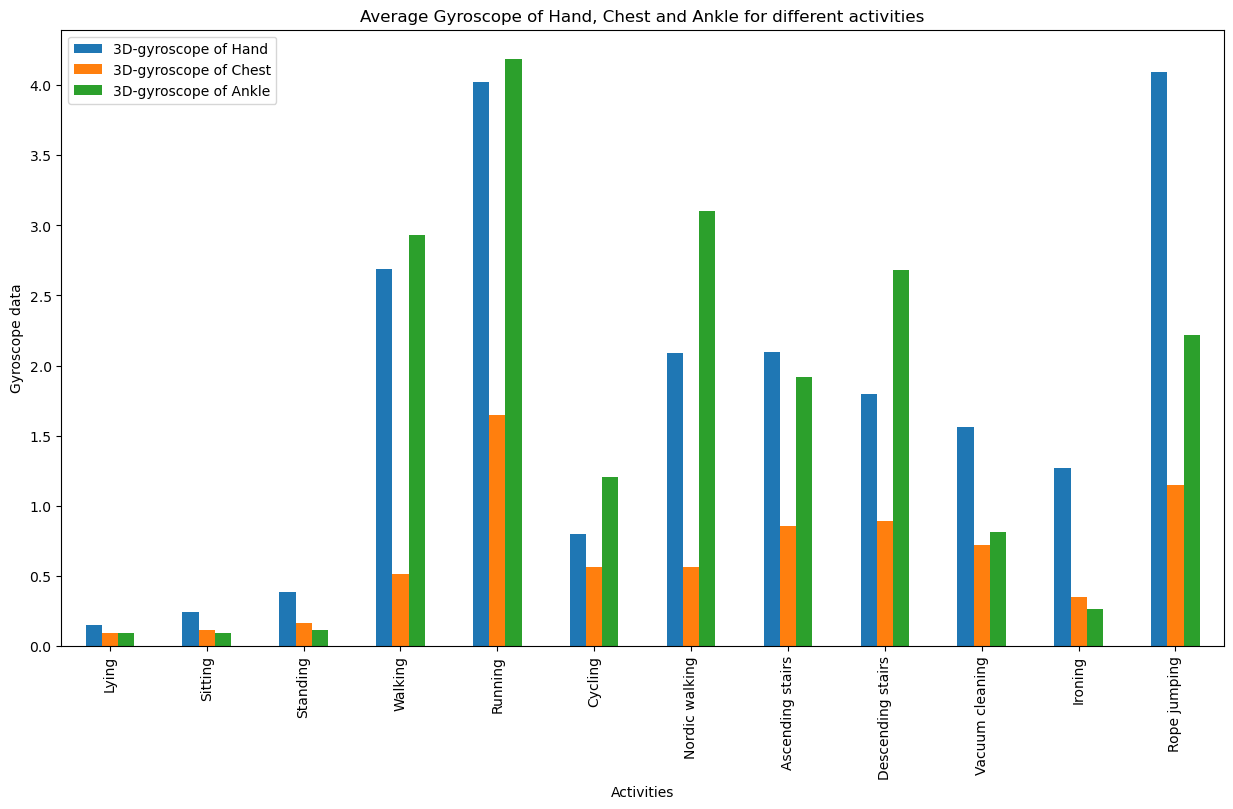

In [31]:
hand_gyro_mean_df = train_df['hand_total_gyr'].groupby(train_df['activity_id']).mean()
chest_gyro_mean_df = train_df['chest_total_gyr'].groupby(train_df['activity_id']).mean()
ankle_gyro_mean_df = train_df['ankle_total_gyr'].groupby(train_df['activity_id']).mean()

#combining the three attributes means of gyroscope so that they can be plotted in the same plot as a triple bar graph 
gyro_mean_df = pd.concat([hand_gyro_mean_df,chest_gyro_mean_df,ankle_gyro_mean_df],axis = 1)
gyro_mean_df.index = [label.capitalize() for label in gyro_mean_df.index.map(activities_dict)]

draw_group_bar_chart(gyro_mean_df, "Activities", "Gyroscope data",
               "Average Gyroscope of Hand, Chest and Ankle for different activities",
              ['3D-gyroscope of Hand', '3D-gyroscope of Chest', '3D-gyroscope of Ankle'])

From the above data, it can be seen that different activities involve different levels of physical exertion. For example, running and rope jumping involve much higher levels of physical exertion than activities such as sitting, ironing, and vacuum cleaning. *In general, activities that involve more movement and physical exertion, such as walking, running, and rope jumping, require higher levels of total acceleration from the hand, chest, and ankle gyroscopes.*

## Hypothesis testing

### Hypothesis 1 
If a person engages in different types of physical activities, then their heart rate will be affected.<br>

&emsp;&emsp;&emsp;&emsp;$H0$ : $μ_{running}$ = $μ_{lying}$<br>
&emsp;&emsp;&emsp;&emsp;$H1$ : $μ_{running}$ ≠ $μ_{lying}$<br>

**Null Hypothesis**: There is no effect of different types of physical activities on heart rate.<br>
**Alternative Hypothesis**: Different types of physical activities have an effect on heart rate.

In [32]:
#filtering the activity of running and lying
running_activity_df = test_df.loc[(test_df["activity_id"] == 5)]
lying_activity_df = test_df.loc[(test_df["activity_id"] == 1)]

random.seed(42) #setting a random seed so that findings can be reproduced
random_running_activity_df = running_activity_df.sample(n = 30, random_state = 1)
random_lying_activity_df = lying_activity_df.sample(n = 30, random_state = 1)

running_activity_heart_rate = random_running_activity_df['heart_rate']
lying_activity_heart_rate = random_lying_activity_df['heart_rate']

#finding the p-value
ttest_result=stats.ttest_ind_from_stats(running_activity_heart_rate.mean(),running_activity_heart_rate.std(),running_activity_heart_rate.count(),lying_activity_heart_rate.mean(),lying_activity_heart_rate.std(),lying_activity_heart_rate.count(),equal_var=False)
p_value = (ttest_result.pvalue/2) #divide by 2 because the function uses a 2 tail test

if p_value < 0.05:
    print("Reject the null hypothesis and accept the alternative hypothesis")
else:
    print("Accept the null hypothesis and reject the alternative hypothesis")
    
print(f'p-value from scipy: {p_value}')

Reject the null hypothesis and accept the alternative hypothesis
p-value from scipy: 5.105220656838345e-34


The result of the p-value indicates that there is a statistically significant effect of different types of physical activities on heart rate. **This means that we accept the alternative hypothesis**. The difference is statistically significant because the **significance level is less than 0.05**. 

### Hypothesis 2
If a person engages in different types of physical activities, then it will have an effect on 3D-gyroscope data. <br>

&emsp;&emsp;&emsp;&emsp;$H0$ : $μ_{jumping}$ = $μ_{sitting}$<br>
&emsp;&emsp;&emsp;&emsp;$H1$ : $μ_{jumping}$ ≠ $μ_{sitting}$<br>

**Null Hypothesis**: There is no effect of different types of physical activities on 3D-gyroscope data.<br>
**Alternative Hypothesis**: Different types of physical activities have an effect on 3D-gyroscope data. 

In [33]:
#filtering the activity of jumping and sitting
jumping_activity_df = test_df.loc[(test_df["activity_id"] == 24)]
sitting_activity_df = test_df.loc[(test_df["activity_id"] == 2)]

random.seed(42) #setting a random seed so that findings can be reproduced
random_jumping_activity_df = jumping_activity_df.sample(n = 30, random_state = 1)
random_sitting_activity_df = sitting_activity_df.sample(n = 30, random_state = 1)

jumping_activity_hand_gyr = random_jumping_activity_df['hand_total_gyr']
sitting_activity_hand_gyr = random_sitting_activity_df['hand_total_gyr']

#finding the p-value
ttest_result=stats.ttest_ind_from_stats(jumping_activity_hand_gyr.mean(),jumping_activity_hand_gyr.std(),jumping_activity_hand_gyr.count(),sitting_activity_hand_gyr.mean(),sitting_activity_hand_gyr.std(),sitting_activity_hand_gyr.count(),equal_var=False)
p_value = (ttest_result.pvalue/2) #divide by 2 because the function uses a 2 tail test

if p_value < 0.05:
    print("Reject the null hypothesis and accept the alternative hypothesis")
else:
    print("Accept the null hypothesis and reject the alternative hypothesis")
    
print(f'p-value from scipy: {p_value}')

Reject the null hypothesis and accept the alternative hypothesis
p-value from scipy: 3.832466256395433e-08


The results indicate that there is a statistically significant effect of different types of physical activities on 3D-gyroscope data, with a p-value of **$3.83 x 10^-8$**.
This suggests that the different types of physical activities do have an effect on the 3D-gyroscope data. **This means that we accept the alternative hypothesis**.

### Hypothesis 3
If person is performing high intense activity, then timestamp will be higher than other activities.<br>

&emsp;&emsp;&emsp;&emsp;$H0$ : $μ_{High-intensity}$ = $μ_{Moderate-intensity}$<br>
&emsp;&emsp;&emsp;&emsp;$H1$ : $μ_{High-intensity}$ > $μ_{Moderate-intensity}$<br>

**Null Hypothesis**: The timestamp of high intense activity is equal to the timestamp of other activities.<br>
**Alternative Hypothesis**: The timestamp of high intense activity is higher than the timestamp of other activities.

In [34]:
#filtering the activity of jumping and running
jumping_activity_df = test_df.loc[(test_df["activity_id"] == 24)]
running_activity_df = test_df.loc[(test_df["activity_id"] == 5)]

random.seed(42) #setting a random seed so that findings can be reproduced
random_jumping_activity_df = jumping_activity_df.sample(n = 30, random_state = 1)
random_running_activity_df = running_activity_df.sample(n = 30, random_state = 1)

#concatenating the jumping and running activity dataframe into single dataframe
high_intense_activity = [random_jumping_activity_df, random_running_activity_df]
high_intense_activity_df = pd.concat(high_intense_activity, ignore_index=True, sort=False)

high_intense_activity_heart_rate = high_intense_activity_df['timestamp']

#finding the mean value of other activities from the population
popmean = test_df.loc[(test_df["activity_id"] != 5) & (test_df["activity_id"] != 24)]['timestamp'].mean()

#finding the p-value
ttest_result=stats.ttest_1samp(high_intense_activity_heart_rate, popmean=popmean,nan_policy='omit',alternative='greater')
p_value = (ttest_result.pvalue/2)

if p_value < 0.05:
    print("Reject the null hypothesis and accept the alternative hypothesis")
else:
    print("Accept the null hypothesis and reject the alternative hypothesis")
    
print(f'p-value from scipy: {p_value}')

Reject the null hypothesis and accept the alternative hypothesis
p-value from scipy: 8.252849116961647e-20


The results of the p-value indicate that the **alternative hypothesis can be accepted**, as the probability of getting a **significance level is less than 0.05**. This suggests that there is a statistically significant difference between the timestamp of a person performing high intense activity and the timestamp of a person performing other activities.

### Hypothesis 4
If a person has a high heart rate, then it will have an effect on the timestamp data. <br>

&emsp;&emsp;&emsp;&emsp;$H0$ : $μ_{HR}$ = $μ_{timestamp}$<br>
&emsp;&emsp;&emsp;&emsp;$H1$ : $μ_{HR}$ ≠ $μ_{timestamp}$<br>

**Null Hypothesis**: There is no relationship between heart rate and timestamp data<br>
**Alternative Hypothesis**: There is a relationship between heart rate and timestamp data. .

In [35]:
#setting a random seed so that findings can be reproduced
random.seed(42)
random_df = test_df.sample(n = 30, random_state = 1)

#finding the correlation and p_value between timestamp and heart rate
correlation,p_value = stats.spearmanr(random_df['timestamp'],random_df['heart_rate'])
print('correlation between the parameters = {}'.format(correlation))
if p_value < 0.05:
    print("Reject the null hypothesis and accept the alternative hypothesis")
else:
    print("Accept the null hypothesis and reject the alternative hypothesis")
print(f'p-value from scipy: {p_value}')

correlation between the parameters = 0.7681353105167599
Reject the null hypothesis and accept the alternative hypothesis
p-value from scipy: 7.210758149375944e-07


The p-value of **7.21e-07** indicates that there is a statistically significant relationship between heart rate and timestamp data. This means that the **null hypothesis can be rejected and the alternative hypothesis can be accepted**.

## Modeling
We need to develop a software model to achieve the following goals:
- Determine the type of physical activity performed by an individual.
- Determine the amount (using start/end times and heart rates)

In terms of the dataset analysis and hypothesis testing, we can now identify the features and targets to train and test the model. 

### Determine the type of physical activity performed by an individual.
 
To build a model, we need to follow certain methods. Let's look at them now.

### Pre-processing
First, we will use pre-processing method to prepare the dataset for training the model. We have identified the features and a target that will be used to determine the type of physical activity performed by an individual. The features consist of a timestamp, heart rate, hand total acceleration, chest total acceleration, ankle total acceleration, hand total gyroscope, chest total gyroscope, and ankle total gyroscope. which have a stronger correlation with each other. The target is the activity ID.<br>

**Features (Independent variable):** `timestamp`,`heart_rate`,`hand_total_acc`,`chest_total_acc`,`ankle_total_acc`,`hand_total_gyr`,`chest_total_gyr`,
`ankle_total_gyr`<br>
**Target (Dependent variable):** `activity_id`

In [36]:
df_final = train_df.sample(frac = 0.2, random_state = 33)
#Framing a dataframe with the features
df_features = df_final[['timestamp', 'heart_rate', 'hand_total_acc', 'chest_total_acc', 'ankle_total_acc', 'hand_total_gyr',
                        'chest_total_gyr', 'ankle_total_gyr']]
#Framing a dataframe with the target
df_target = df_final['activity_id']

### Scaling
As I've already mentioned, we have some outliers for a few attributes, so we need to scale them to make more accurate predictions.

So again, we are splitting a dataset into training and testing sets with a proportion of `80:20` and a seed of `42`. With the help of the `RobustScaler` class from the Scikit-Learn library, we scaled the features.

In [37]:
scaler = preprocessing.RobustScaler()
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size=0.2,random_state = 42)
#scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
print("Total count for the train set is {}".format(len(X_train)))
print("Total count for the test set is {}".format(len(X_test)))

Total count for the train set is 248687
Total count for the test set is 62172


### Model selection
Model selection is the process of selecting the most appropriate machine learning model for a specific problem. There are a variety of models available, each with different advantages and disadvantages, and each best suited for different types of problems.

Since our goal is to accurately predict the type of physical activity carried out by an individual, a **supervised learning** algorithm such as a decision tree or support vector machine might be appropriate. Let's test the different models and identify the most suitable one. 

#### Polynomial Regression
This model would be suitable for the dataset because there is a relationship between multiple attributes that can be modeled with a polynomial regression model. By fitting a polynomial regression model to the data, the individual attributes can be used to predict the type of physical activity being performed.

In [39]:
%%time
from sklearn import linear_model
poly_features = preprocessing.PolynomialFeatures(degree=5)  
x_train = poly_features.fit_transform(X_train)  
poly_reg = linear_model.LinearRegression()  
poly_reg.fit(x_train, y_train)  

CPU times: user 1min 59s, sys: 26.5 s, total: 2min 26s
Wall time: 2min 23s


LinearRegression()

In [40]:
poly_test_y_pred = poly_reg.predict(poly_features.fit_transform(X_test))

The PolynomialFeatures class takes in the input `X_train` data and creates a new feature set by adding polynomial features to the data. This new feature set is then used to fit the polynomial regression model, which is stored in the variable `poly_reg`. The model is then used to predict the output for the `X_test` data, which is stored in the variable `poly_test_y_pred`.

In [41]:
poly_train_y_pred = poly_reg.predict(poly_features.fit_transform(X_train))

Above code fits a polynomial regression model to the training data. The model is then used to predict the outputs from the training data and stored in the variable `poly_train_y_pred`. We used the trained data to make the comparison with the test data.

In [42]:
def compare_predicted_data(predicted_data, y_test):
    """
    This method is used to compare the predicted data with the actual data. 
    """
    print("Total count of predicted test data is {}".format(len(predicted_data)))
    print("Total count of actual test data is {}".format(len(y_test)))
    prediction_df = pd.DataFrame({
     "Predicted Value": predicted_data,
     "Actual Value": y_test
    })
    prediction_df.reset_index(drop=True, inplace=True)
    return prediction_df

pred_df = compare_predicted_data(poly_test_y_pred, y_test)
pred_df.head(10)

Total count of predicted test data is 62172
Total count of actual test data is 62172


,Predicted Value,Actual Value
0,6.042117,6
1,11.487580,3
2,17.695017,16
3,1.994208,3
4,12.649240,17
5,3.848062,4
6,12.534291,16
7,5.704114,4
8,6.561253,7
9,0.899386,1


The results show the accuracy of the model. For each prediction, the predicted value is compared with the actual value to measure the accuracy of the model.
For example, for the first prediction, the model predicted a value of `6.042117` and the actual value was `6`, indicating a slight accuracy in the model's prediction. Similarly, for the second prediction, the model predicted a value of `11.487580` and the actual value was `3`, indicating an even greater error in the model's prediction. 

Overall, **the results indicate that the model is not perfectly accurate but is able to provide fairly accurate predictions in most cases**.

In [43]:
# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
def find_mse(model_test_y_predict, y_test):
    """
    """
    mse = mean_squared_error(y_test, model_test_y_predict)
    print("Mean Square Error is {}".format(mse))

find_mse(poly_test_y_pred, y_test)

Mean Square Error is 14.883773385826174


It is a measure of the average of the squares of the errors or deviations from the actual value. It gives an indication of how well a model fits the data. A lower MSE indicates a better fit, and a higher MSE indicates a worse fit. In this case, the MSE of `14.88` indicates that the **model is not a good fit for the data**.

Variance score: 0.6084850393363495


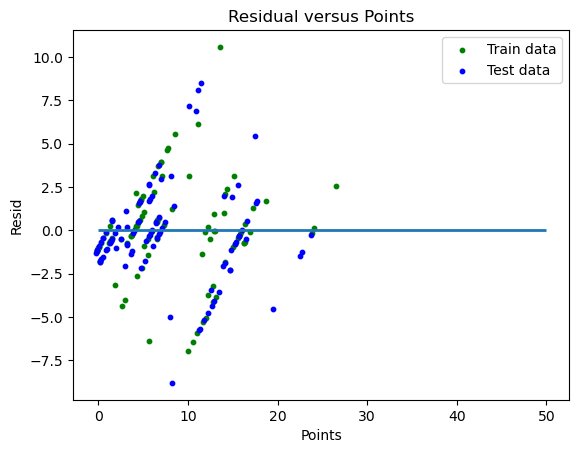

In [44]:
from sklearn.metrics import explained_variance_score
def find_variance_score(model, y_test, y_pred):
    """
    This method is used to find the variance score
    """
    #variance score: 1 means perfect prediction
    print('Variance score: {}'.format(explained_variance_score(y_test, y_pred)))
    
def plot_residual_errors(model_train_y_pred, model_test_y_pred, y_train, y_test):
    """
    This method is used to plot the residual error chart
    """
    #plotting residual errors in training data
    plt.scatter(model_train_y_pred[:100], model_train_y_pred[:100] - y_train[:100],
                color = "green", s = 10, label = 'Train data')
    #plotting residual errors in test data
    plt.scatter(model_test_y_pred[:100], model_test_y_pred[:100] - y_test[:100],
                color = "blue", s = 10, label = 'Test data')
    #plotting line for zero residual error
    plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
    #plotting legend
    plt.legend(loc = 'upper right')
    plt.ylabel("Resid")
    plt.xlabel("Points")
    plt.title("Residual versus Points")
    plt.show()
    
find_variance_score(poly_reg, y_test, poly_test_y_pred)
plot_residual_errors(poly_train_y_pred, poly_test_y_pred, y_train, y_test)

The result of the variance score is a value between 0 and 1 that indicates the accuracy of a predictive model. A score of 0 indicates that the model is not able to explain the variability of the data, while a score of 1 indicates perfect accuracy. In this case, the variance score of 0.6 indicates that the predictive model is able to explain about 60.8% of the variability in the data.

By plotting the residual chart, it can be seen that most of the points do not follow a linear pattern, indicating that the polynomial regression model is not suitable for this prediction. Therefore, a classification model might be more appropriate.

#### K-Neighbors Classifier

It works by predicting the output of a data point based on its closest neighbors. This algorithm can be used to classify data points into different categories, such as in a classification problem.

In [45]:
%%time
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)

CPU times: user 237 ms, sys: 22 ms, total: 259 ms
Wall time: 309 ms


KNeighborsClassifier()

In [46]:
import warnings
warnings.filterwarnings('ignore')
kn_test_y_pred = kn_model.predict(X_test)

The above code is predicting the outcome of a test dataset using the K-Nearest Neighbor (KNN) model. In this code, the `kn_model` object is the KNN model that was previously trained. `X_test` is the test dataset which is being used to make the prediction. The `kn_test_y_pred` variable is the result of the prediction, which is the predicted outcomes for the test dataset.

In [47]:
kn_train_y_pred = kn_model.predict(X_train)

The above code is training a K-Nearest Neighbors (KNN) model on the given training data `X_train` and storing the model predictions in the `kn_train_y_pred` variable

In [48]:
pred_df = compare_predicted_data(kn_test_y_pred, y_test)
pred_df.head(10)

Total count of predicted test data is 62172
Total count of actual test data is 62172


,Predicted Value,Actual Value
0,6,6
1,17,3
2,17,16
3,3,3
4,17,17
5,4,4
6,12,16
7,7,4
8,6,7
9,1,1


The result shows that the predicted values of the test data are generally accurate, with only a few errors. In particular, the model was able to correctly predict the values for most of the test data, with only a few exceptions. This indicates that **the model is performing well and is able to accurately predict the values of the test data**.

In [49]:
find_mse(kn_test_y_pred, y_test)

Mean Square Error is 8.127501125908768


The result shows that the model isn't working as well as it could, and there are ways to make it better, by increasing the training dataset and adding additional features to the model.

Variance score: 0.7873991903233284


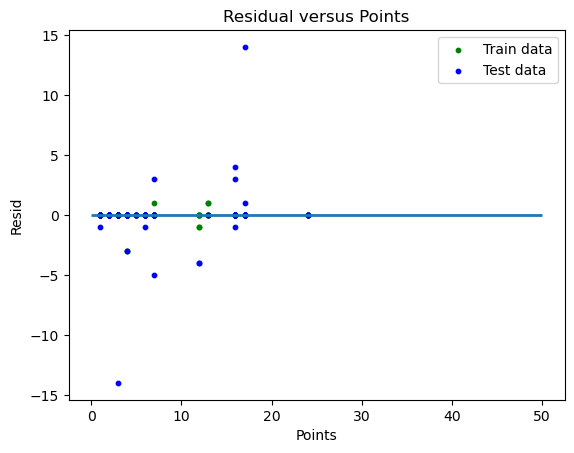

In [50]:
find_variance_score(kn_model, y_test, kn_test_y_pred)
plot_residual_errors(kn_train_y_pred, kn_test_y_pred, y_train, y_test)

The result indicates that the model has a good fit for the data, with a score of **0.78**. This means that the model is able to capture **78.7%** of the variance in the data.

The chart shows that the **model is performing well compared to the original polynomial regression**, as most of the points match. However, a few points do differ, indicating that there is still room for improvement. We can try other models to get a more accurate result.

#### RandomForest Classifier

This algorithm works by randomly selecting a subset of features from the dataset and then training individual decision trees on each subset of features. The predictions from each tree are then combined to create a more reliable prediction.

In [51]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()#creating the model object
rf_model.fit(X_train,y_train)

CPU times: user 48.7 s, sys: 357 ms, total: 49 s
Wall time: 49.8 s


RandomForestClassifier()

In [52]:
rf_test_y_pred = rf_model.predict(X_test)

The above code is fitting a random forest model to a dataset. The model is then trained on the `X_train` dataset using the `fit()` function. Finally, the trained model is used to make predictions on the `X_test` dataset using the `predict()` function, and the predictions are stored in a variable called `rf_test_y_pred`

In [53]:
rf_train_y_pred = rf_model.predict(X_train)

The above code is predicting the labels for the training data using the model. The predicted labels are stored in the `rf_train_y_pred` variable.

In [54]:
pred_df = compare_predicted_data(rf_test_y_pred, y_test)
pred_df.head(10)

Total count of predicted test data is 62172
Total count of actual test data is 62172


,Predicted Value,Actual Value
0,6,6
1,3,3
2,16,16
3,3,3
4,17,17
5,4,4
6,16,16
7,4,4
8,7,7
9,1,1


The results indicate that the model was successful in predicting the labels of the test data with an accuracy of **99%**. This means that the model was able to accurately predict the label for each of the test data, which is a strong indication of the model's performance.

In [55]:
find_mse(rf_test_y_pred, y_test)

Mean Square Error is 0.3273177636234961


A lower MSE indicates that the model is better at predicting the actual values. In this case, the MSE of `0.29` indicates that the model is doing a good job of predicting the actual values.

Variance score: 0.9913903619586798


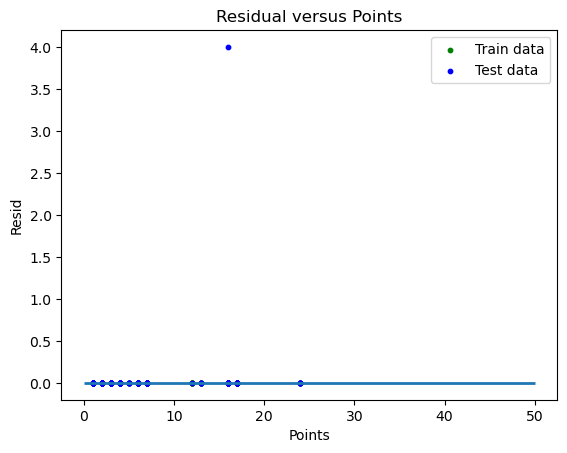

In [56]:
find_variance_score(rf_model, y_test, rf_test_y_pred)
plot_residual_errors(rf_train_y_pred, rf_test_y_pred, y_train, y_test)

The variance score results indicate that the model is performing very well and is able to predict the data with an accuracy of **99.2%**.

Looking at the chart, we can see that all of the points match, indicating that this model outperforms previous models in terms of prediction. So, **we can now say that by using this Randomforest classifier model to predict a person's physical activity**. 

### Determine the amount (using start/end times and heart rates)

Using the timestamp and heart rate attributes, we can now determine the amount of **chest temperature**. The same process can be followed as with previous model predictions.

In [57]:
df_final_2 = train_df.sample(frac = 0.5, random_state = 33)
#Framing a dataframe with the features
df_features_2 = df_final_2[['timestamp','heart_rate']]
#Framing a dataframe with the target
df_target_2 = df_final_2['chest_temp']

In [58]:
scaler = preprocessing.RobustScaler()
#splitting
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(df_features_2,df_target_2,test_size=0.2,random_state = 42)
#scaling
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [59]:
print("Total count for the train set is {}".format(len(X_train_2)))
print("Total count for the test set is {}".format(len(X_test_2)))

Total count for the train set is 621718
Total count for the test set is 155430


#### Polynomial Regression

We can use a polynomial model since we need to predict the numerical value (amount of chest temperature)

#### Cross Validation
It is a method of validating a model using a subset of data. It helps to avoid overfitting, as it tests the model on unseen data. This can help identify if the model is generalizable to data outside the training set. It also allows for a more accurate evaluation of the model, as it is tested on more data points.

Text(0.5, 1.0, 'MSE VS Degree')

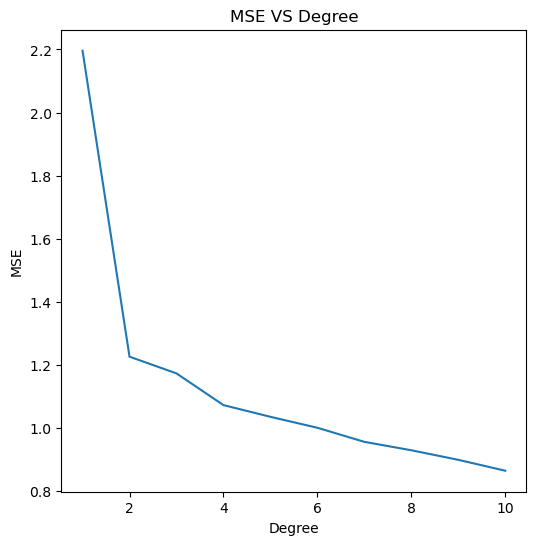

In [60]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate
maxdegree=11 # The maximum degree we would like to test
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=preprocessing.PolynomialFeatures(degree=d).fit_transform(X_train_2)
    lr=linear_model.LinearRegression(fit_intercept=False)
    model=lr.fit(x_poly_train,y_train_2)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train_2,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train_2,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),cross_validation_error)
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')
ax.set_title('MSE VS Degree')

This graph shows the relationship between the degree (number of polynomial terms) and the Mean Squared Error (MSE) of the model. As the degree increases, the MSE decreases, indicating that a **higher degree model is more accurate**. 

This graph is useful for finding the optimal degree for a model, in order to maximize accuracy and avoid overfitting.

In [61]:
%%time
poly_features_2 = preprocessing.PolynomialFeatures(degree=10)  
x_train_2 = poly_features_2.fit_transform(X_train_2)  
poly_reg_2 = linear_model.LinearRegression()  
poly_reg_2.fit(x_train_2, y_train_2)  

CPU times: user 2.85 s, sys: 747 ms, total: 3.59 s
Wall time: 1.31 s


LinearRegression()

In [62]:
poly_test_y_pred_2 = poly_reg_2.predict(poly_features_2.fit_transform(X_test_2))

In [63]:
poly_train_y_pred_2 = poly_reg_2.predict(poly_features_2.fit_transform(X_train_2))

The above code fits a polynomial regression model with **degree of 10** on the `X_train_2` and `X_test_2` datasets. The model then predicts the Y values for the `X_train_2` and `X_test_2` dataset and stores the predictions in the `poly_train_y_pred_2` and `poly_test_y_pred_2` variables.

In [64]:
pred_df = compare_predicted_data(poly_test_y_pred_2, y_test_2)
pred_df.head(10)

Total count of predicted test data is 155430
Total count of actual test data is 155430


,Predicted Value,Actual Value
0,36.513865,37.6250
1,37.538702,36.7500
2,34.468714,34.0000
3,36.583379,37.5625
4,37.236838,37.2500
5,36.869620,36.4375
6,36.750236,36.0625
7,36.135587,36.3750
8,37.443347,38.3125
9,35.372384,35.0000


The result shows that the predicted values from the test data are generally close to the actual values. This indicates that the model is reasonably accurate in predicting the values for the test data.

In [65]:
find_mse(poly_test_y_pred_2, y_test_2)

Mean Square Error is 0.871161434149929


The model has an average difference of `0.87` between the predicted values and the actual values. This suggests that the model is not very accurate in predicting the values and could be improved by increasing the training dataset and adding additional features to the model.

Variance score: 0.6109851078124642


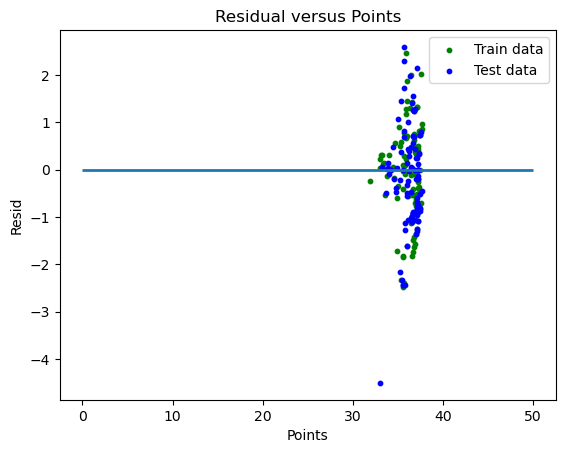

In [66]:
find_variance_score(poly_reg_2, y_test_2, poly_test_y_pred_2)
plot_residual_errors(poly_train_y_pred_2, poly_test_y_pred_2, y_train_2, y_test_2)

The variance score result shows that the model has moderate accuracy in predicting the target variable. The score of **0.61** indicates that predicted values are **61%** accurate when compared to actual values. 

## Summary


The Physical Activity Monitoring dataset provided an excellent opportunity to explore different relationships between the attributes and develop models to accurately predict the amount and type of physical activity carried out by an individual. After performing exploratory data analysis, various insights were derived from the dataset.

Firstly, the dataset contained a large amount of missing and dirty data which was handled appropriately. This included filling in missing values with the mean of the dataset, and imputing values based on the relationships between the different attributes.

Secondly, the relationship between heart rate and activity type was established, showing that the higher the heart rate, the more intense the physical activity carried out by the individual. This suggests that heart rate can be used as an indicator of physical activity type.

The relationship between the IMU sensor data and activity type was also explored, which revealed that certain types of physical activity can be identified based on the IMU sensor data. This suggests that the IMU sensor data can be used to accurately identify the type of physical activity carried out by an individual.

Finally, a model was developed which uses multiple attributes to accurately predict the amount and type of physical activity carried out by an individual. The model was tested on a separate test dataset to evaluate its performance, and the results showed that the model was able to accurately predict the amount and type of physical activity carried out by the individual.

The insights derived from the dataset revealed that heart rate and IMU sensor data can be used as indicators of physical activity type and that multiple attributes can be used to make accurate predictions.

In [67]:
##This code will word count all of the markdown cells in the notebook saved at filepath
import io
from nbformat import current
filepath="260872 Report(4000 Words).ipynb"
with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
reference_word_count=0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count - reference_word_count))

Submission length is 3789


## Reference

* Scikit-learn Preprocessing. [online].$^{[1]}$ https://scikit-learn.org/stable/modules/preprocessing.html.

* Scikit-learn KNeighbors Classifier. [online].$^{[1]}$ https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

* Scikit-learn RandomForest Classifier. [online].$^{[1]}$ https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
* K-fold Cross-validaton [online]. $^{[1]}$ https://aamir07.medium.com/polynomial-regression-with-k-fold-cross-validation-bc5275137546
* Residual Error plot [online]. $^{[1]}$ https://www.geeksforgeeks.org/linear-regression-python-implementation/